In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [7]:
ds = pd.read_excel("dataset.xlsx")
ds.head()

,Bulan,Suhu (X1),Kelembaban (X2),Tekanan_Udara (X3),Kecepatan_Angin (X4),Penyinaran_Matahari (X5),Curah_Hujan (Y)
0,Jan '18,27.2,84,1007.5,5.7,41,348.6
1,Feb '18,26.7,86,1010.1,5.5,56,535.5
2,Mar '18,27.5,83,1009.3,4.4,58,227.3
3,Apr '18,28.9,78,1009.6,4.9,82,212.0
4,Mei '18,29.2,75,1009.8,5.9,83,17.9


In [8]:
ds.describe()

,Suhu (X1),Kelembaban (X2),Tekanan_Udara (X3),Kecepatan_Angin (X4),Penyinaran_Matahari (X5),Curah_Hujan (Y)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,28.041667,79.645833,1010.193750,5.183333,72.854167,173.429167
std,0.868315,6.596226,0.969625,0.975952,18.367397,147.673300
min,25.500000,67.000000,1007.500000,3.800000,34.000000,0.000000
25%,27.500000,75.000000,1009.700000,4.700000,57.500000,53.125000
50%,28.150000,80.500000,1010.200000,5.000000,76.500000,168.500000
75%,28.600000,85.000000,1010.650000,5.525000,88.250000,242.250000
max,29.900000,92.000000,1012.800000,10.300000,99.000000,694.000000


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bulan                     48 non-null     object 
 1   Suhu (X1)                 48 non-null     float64
 2   Kelembaban (X2)           48 non-null     int64  
 3   Tekanan_Udara (X3)        48 non-null     float64
 4   Kecepatan_Angin (X4)      48 non-null     float64
 5   Penyinaran_Matahari (X5)  48 non-null     int64  
 6   Curah_Hujan (Y)           48 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.8+ KB


In [10]:
ds.duplicated().sum()

0

In [11]:
ds.isnull().sum()

Bulan                       0
Suhu (X1)                   0
Kelembaban (X2)             0
Tekanan_Udara (X3)          0
Kecepatan_Angin (X4)        0
Penyinaran_Matahari (X5)    0
Curah_Hujan (Y)             0
dtype: int64

In [12]:
ds.skew()

<ipython-input-12-2732d6570a07>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds.skew()


Suhu (X1)                  -0.446724
Kelembaban (X2)            -0.329701
Tekanan_Udara (X3)         -0.087151
Kecepatan_Angin (X4)        3.182554
Penyinaran_Matahari (X5)   -0.444123
Curah_Hujan (Y)             1.166254
dtype: float64

In [13]:
ds.kurt()

<ipython-input-13-4e8ab8671373>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds.kurt()


Suhu (X1)                    0.569381
Kelembaban (X2)             -0.872002
Tekanan_Udara (X3)           1.270601
Kecepatan_Angin (X4)        15.638866
Penyinaran_Matahari (X5)    -1.009111
Curah_Hujan (Y)              2.216686
dtype: float64

In [14]:
ds.corr()

,Suhu (X1),Kelembaban (X2),Tekanan_Udara (X3),Kecepatan_Angin (X4),Penyinaran_Matahari (X5),Curah_Hujan (Y)
Suhu (X1),1.000000,-0.215053,0.118331,-0.074986,0.441298,-0.391305
Kelembaban (X2),-0.215053,1.000000,-0.734538,-0.064393,-0.871129,0.780581
Tekanan_Udara (X3),0.118331,-0.734538,1.000000,0.166268,0.723086,-0.617920
Kecepatan_Angin (X4),-0.074986,-0.064393,0.166268,1.000000,0.007221,0.148134
Penyinaran_Matahari (X5),0.441298,-0.871129,0.723086,0.007221,1.000000,-0.798577
Curah_Hujan (Y),-0.391305,0.780581,-0.617920,0.148134,-0.798577,1.000000


<Axes: >

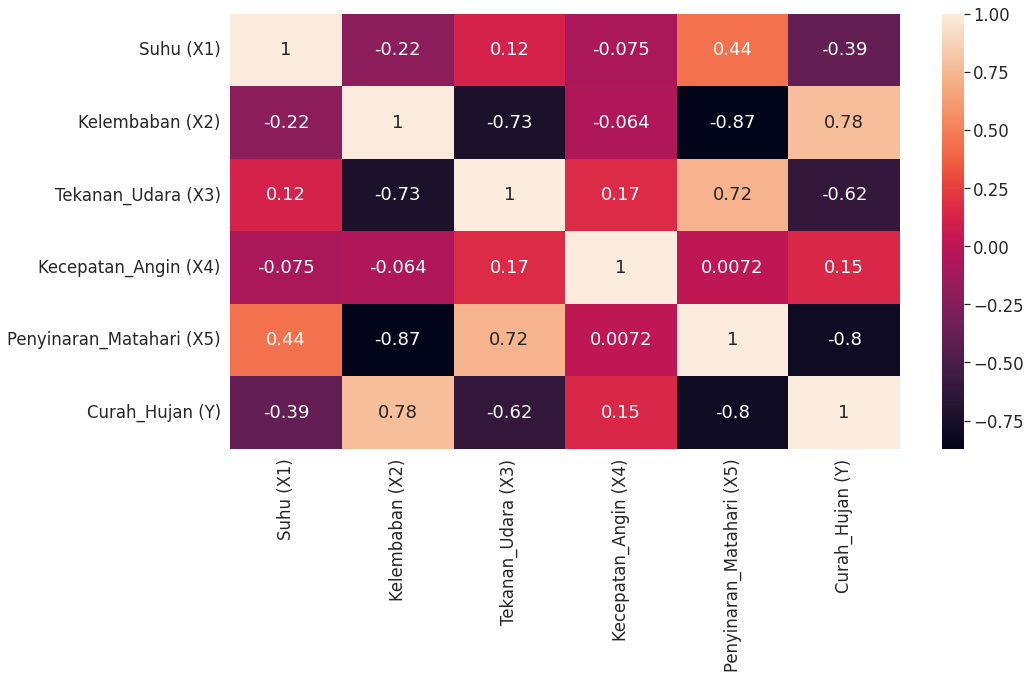

In [15]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
sns.heatmap(ds.corr(), annot = True)

In [18]:
ds.head()

,Bulan,Suhu (X1),Kelembaban (X2),Tekanan_Udara (X3),Kecepatan_Angin (X4),Penyinaran_Matahari (X5),Curah_Hujan (Y)
0,Jan '18,27.2,84,1007.5,5.7,41,348.6
1,Feb '18,26.7,86,1010.1,5.5,56,535.5
2,Mar '18,27.5,83,1009.3,4.4,58,227.3
3,Apr '18,28.9,78,1009.6,4.9,82,212.0
4,Mei '18,29.2,75,1009.8,5.9,83,17.9


In [25]:
ds.dtypes

Bulan                        object
Suhu (X1)                   float64
Kelembaban (X2)               int64
Tekanan_Udara (X3)          float64
Kecepatan_Angin (X4)        float64
Penyinaran_Matahari (X5)      int64
Curah_Hujan (Y)             float64
dtype: object

In [27]:
x = ds.iloc[:,1:6].values
y = ds['Curah_Hujan (Y)'].values
y

array([348.6, 535.5, 227.3, 212. ,  17.9,  44.5,   0. ,   0. ,  20. ,
       134. , 271. , 249. , 214. , 224. , 178. , 217. , 115. ,   1. ,
         1. ,   2. ,  11. ,   8. ,  71. , 231. , 301. , 393. , 232. ,
       292. , 270. ,  22. ,  71.8,  56. ,  91. , 164. , 240. , 380. ,
       273. , 694. , 122. , 131. , 205. , 134. ,  15. ,  65. , 199. ,
       119. , 349. , 173. ])

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xscaled = scaler.fit_transform(x)
xscaled

array([[0.38636364, 0.68      , 0.        , 0.29230769, 0.10769231],
       [0.27272727, 0.76      , 0.49056604, 0.26153846, 0.33846154],
       [0.45454545, 0.64      , 0.33962264, 0.09230769, 0.36923077],
       [0.77272727, 0.44      , 0.39622642, 0.16923077, 0.73846154],
       [0.84090909, 0.32      , 0.43396226, 0.32307692, 0.75384615],
       [0.68181818, 0.32      , 0.62264151, 0.        , 0.83076923],
       [0.47727273, 0.16      , 0.64150943, 0.18461538, 0.92307692],
       [0.47727273, 0.08      , 0.79245283, 0.23076923, 0.83076923],
       [0.        , 0.08      , 0.77358491, 0.2       , 0.8       ],
       [0.27272727, 0.08      , 0.69811321, 0.21538462, 0.92307692],
       [0.25      , 0.52      , 0.52830189, 0.13846154, 0.53846154],
       [0.56818182, 0.68      , 0.50943396, 0.07692308, 0.24615385],
       [0.45454545, 0.72      , 0.41509434, 0.27692308, 0.2       ],
       [0.52272727, 0.72      , 0.71698113, 0.09230769, 0.52307692],
       [0.43181818, 0.8       , 0.

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(xscaled, y, test_size=0.2, random_state=42)

In [30]:
print("Jumlah Data Training = ", xtrain.shape)
print("Jumlah Data Testing = ", xtest.shape)

Jumlah Data Training =  (38, 5)
Jumlah Data Testing =  (10, 5)


In [31]:
model = tf.keras.models.Sequential()

In [32]:
model.add(tf.keras.layers.Dense(units=5, activation='relu')) #input
model.add(tf.keras.layers.Dense(units=6, activation='relu')) #hidden layer
model.add(tf.keras.layers.Dense(units=1)) #output
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(xtrain, ytrain, epochs=5000)

Output streaming akan dipotong hingga 5000 baris terakhir.
2/2 [==============================] - 0s 5ms/step - loss: 52.9901
Epoch 2085/5000
2/2 [==============================] - 0s 5ms/step - loss: 52.9953
Epoch 2086/5000
2/2 [==============================] - 0s 5ms/step - loss: 53.0001
Epoch 2087/5000
2/2 [==============================] - 0s 5ms/step - loss: 53.0006
Epoch 2088/5000
2/2 [==============================] - 0s 5ms/step - loss: 53.0035
Epoch 2089/5000
2/2 [==============================] - 0s 4ms/step - loss: 52.9880
Epoch 2090/5000
2/2 [==============================] - 0s 4ms/step - loss: 52.9709
Epoch 2091/5000
2/2 [==============================] - 0s 4ms/step - loss: 52.9639
Epoch 2092/5000
2/2 [==============================] - 0s 5ms/step - loss: 52.9554
Epoch 2093/5000
2/2 [==============================] - 0s 5ms/step - loss: 52.9491
Epoch 2094/5000
2/2 [==============================] - 0s 5ms/step - loss: 52.9407
Epoch 2095/5000
2/2 [=======================

In [33]:
pred = model.predict(xtest)
pred

1/1 [==============================] - 0s 154ms/step


array([[235.00438 ],
       [167.81308 ],
       [264.42453 ],
       [ 55.581696],
       [296.19077 ],
       [423.0086  ],
       [294.6942  ],
       [ 11.014133],
       [110.3354  ],
       [382.1622  ]], dtype=float32)

<Figure size 432x288 with 0 Axes>

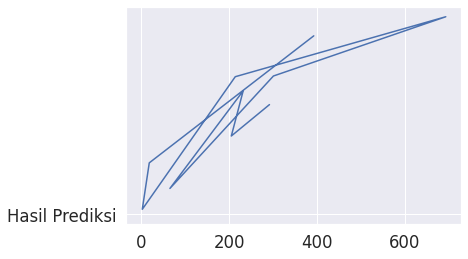

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(ytest, pred, 'b', "Hasil Prediksi")
plt.figure()

In [35]:
model.evaluate(xtest, ytest)

1/1 [==============================] - 0s 228ms/step - loss: 60.4808


60.48076248168945

In [36]:

mae = mean_absolute_error(ytest, pred)
mae

60.48075538635254

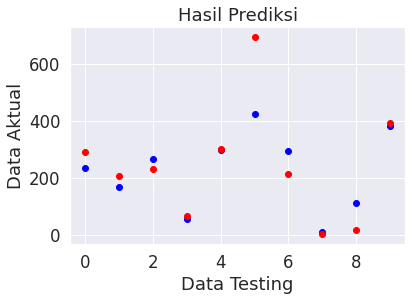

In [37]:
a = range(len(ytest))

plt.scatter(a,pred, color = 'blue')
plt.scatter(a,ytest, color='red')
plt.title("Hasil Prediksi")
plt.xlabel("Data Testing")
plt.ylabel("Data Aktual")
plt.show()

Dari hasil pengujian diatas bahwa diambil kesimpulan hasil prediksi mendekati hasil dari data aktual